In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json 

# an iPython  "magic" that enables the embedding of matplotlib output
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [2]:
#load the data
with open("admissions.json", "rt") as INFILE:
    admissions=json.load(INFILE)
with open("cases.json", "rt") as INFILE:
    cases=json.load(INFILE)
with open("deaths.json", "rt") as INFILE:
    deaths=json.load(INFILE)

with open("influenzaAdmission.json", "rt") as INFILE:
    influenzaAdmissions=json.load(INFILE)   
with open("bedsDay.json", "rt") as INFILE:
    bedsDay=json.load(INFILE)
# with open("COVID-19_cases_casesByDay.json", "rt") as INFILE:
#     CovidDay=json.load(INFILE)
    
#compare the pcr tests for covid and influenza
with open("CovidPCRlatest.json", "rt") as INFILE:
    CovidPCR=json.load(INFILE)
with open("influenzaPCRlatest.json", "rt") as INFILE:
    influenzaPCR=json.load(INFILE)

#dated deaths
with open("deaths_2022.json", "rt") as INFILE:
    deaths_2022=json.load(INFILE)
with open("deaths_2023.json", "rt") as INFILE:
    deaths_2023=json.load(INFILE)
with open("deaths_2024.json", "rt") as INFILE:
    deaths_2024=json.load(INFILE)
    

#function to convert a date string into a pandas datetime object
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

2020-02-08 00:00:00  to  2024-11-02 00:00:00
2020-08-01 00:00:00  to  2024-10-31 00:00:00


Text(0.5, 0, 'Year')

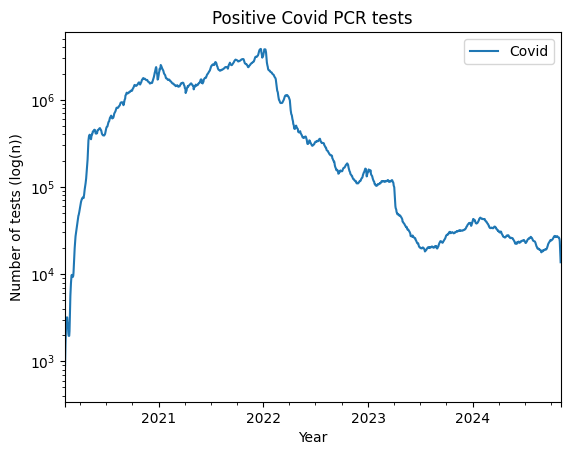

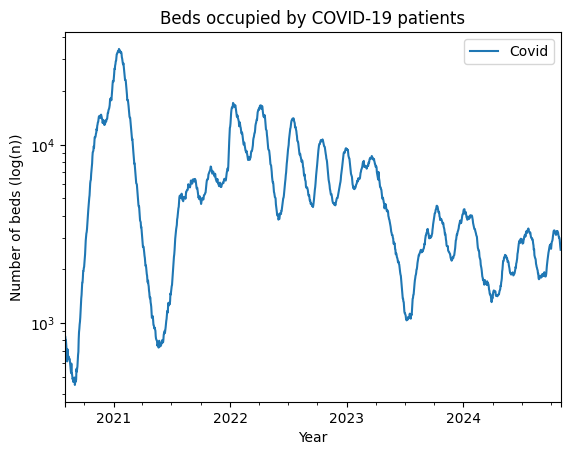

In [ ]:


def wrangle_data(rawdata):
    """ Parameters: rawdata - data from json file or API call. Returns a dataframe.
    Edit to include the code that wrangles the data, creates the dataframe and fills it in. """
    #convert the combined data into a pandas dataframe
    newJson={}
    for entry in rawdata:
        date=entry["date"]
        metric=entry["metric"]
        value =entry["metric_value"]
        if date not in newJson:
            newJson[date]={}
        newJson[date][metric]=value
        
    dates=list(newJson.keys())
    dates.sort()

    #convert start and end dates to pandas format for the index data range
    startDate=parse_date(dates[0])
    endDate=parse_date(dates[-1])
    print (startDate, ' to ', endDate)
    
    metrics ={'Covid': metric}
    
    index = pd.date_range(startDate, endDate, freq='D')
    df=pd.DataFrame(index=index, columns=['Covid'])
    
    for date, entry in newJson.items(): # each entry is a dictionary with cases, admissions and deaths
        pd_date=parse_date(date) # convert to Pandas format
        for column in ['Covid']: 
            metric_name=metrics[column]
            # do not assume all values are there for every date - if a value is not available, insert a 0.0
            value= entry.get(metric_name, 0.0)
            # this is the way you access a specific location in the dataframe - use .loc
            # and put index,column in a single set of [ ]
            df.loc[date, column]=value
    # fill in any remaining "holes" due to missing dates
    df.fillna(0.0, inplace=True)
    return df

# putting the wrangling code into a function allows you to call it again after refreshing the data through 
# the API. You should call the function directly on the JSON data when the dashboard starts, by including 
# the call in this cell as below:

pcrdf=wrangle_data(CovidPCR).plot(logy=True)# df is the dataframe for plotting
pcrdf.set_title('Positive Covid PCR tests')
pcrdf.set_ylabel('Number of tests (log(n))')
pcrdf.set_xlabel('Year')
bedsdf=wrangle_data(bedsDay).plot(logy=True)# df is the dataframe for plotting
bedsdf.set_title('Beds occupied by COVID-19 patients')
bedsdf.set_ylabel('Number of beds (log(n))')
bedsdf.set_xlabel('Year')




In [4]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# in the dashboard, this should be computed from the json files
timeseriesdf=pd.read_pickle("pcrTests.pkl")

series=wdg.SelectMultiple(
    options=['CovidPCR', 'influenzaPCR'],
    value=['CovidPCR', 'influenzaPCR'],
    rows=2,
    description='Stats:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
#   value='pineapple', # Defaults to 'pineapple'
#   layout={'width': 'max-content'}, # If the items' names are long
    description='Scale:',
    disabled=False
)

# try replacing HBox with a VBox
controls=wdg.HBox([series, scale])

def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        timeseriesdf[list(gcols)].plot(logy=logscale)
        plt.show() # important - graphs won't update if this is missing 
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

# keep calling timeseries_graph(gcols=value_of_series, gscale=value_of_scale); 
# capture output in widget graph   
graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

Output()

In [6]:
# in the dashboard, this should be computed from the json files
timeseriesdf=pd.read_pickle("pcrTests.pkl")

series=wdg.SelectMultiple(
    options=['CovidPCR', 'influenzaPCR'],
    value=['CovidPCR', 'influenzaPCR'],
    rows=2,
    description='Stats:',
    disabled=False
)

seriesAnother=wdg.SelectMultiple(
    options=['CovidPCR', 'influenzaPCR'],
    value=['CovidPCR', 'influenzaPCR'],
    rows=2,
    description='Stats:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
#   value='pineapple', # Defaults to 'pineapple'
#   layout={'width': 'max-content'}, # If the items' names are long
    description='Scale:',
    disabled=False
)

# try replacing HBox with a VBox
controls=wdg.HBox([series, scale, seriesAnother])

def timeseries_graph(gcols, gscale, seriesAnother):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        timeseriesdf[list(gcols)].plot(logy=logscale)
        timeseriesdf[list(seriesAnother)].plot(logy=logscale)
        plt.show() # important - graphs won't update if this is missing 
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

# keep calling timeseries_graph(gcols=value_of_series, gscale=value_of_scale); 
# capture output in widget graph   
graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale, 'seriesAnother': seriesAnother})

display(controls, graph)

Output()

In [7]:
#covid cases by day and beds
# in the dashboard, this should be computed from the json files
timeseriesdf=pd.read_pickle("covidDayBeds.pkl")

series=wdg.SelectMultiple(
    options=['beds', 'covidCases'],
    value=['beds', 'covidCases'],
    rows=3,
    description='Stats:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
#   value='pineapple', # Defaults to 'pineapple'
#   layout={'width': 'max-content'}, # If the items' names are long
    description='Scale:',
    disabled=False
)

# try replacing HBox with a VBox
controls=wdg.HBox([series, scale])

def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        timeseriesdf[list(gcols)].plot(logy=logscale)
        plt.show() # important - graphs won't update if this is missing 
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

# keep calling timeseries_graph(gcols=value_of_series, gscale=value_of_scale); 
# capture output in widget graph   
graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

Output()

2017-07-03 00:00:00  to  2024-11-11 00:00:00


/var/folders/0g/05700__976v93g3f39_3753r0000gn/T/ipykernel_94789/709955422.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pcrtimeseriesdf.fillna(0.0, inplace=True)


Text(0.5, 0, 'Date')

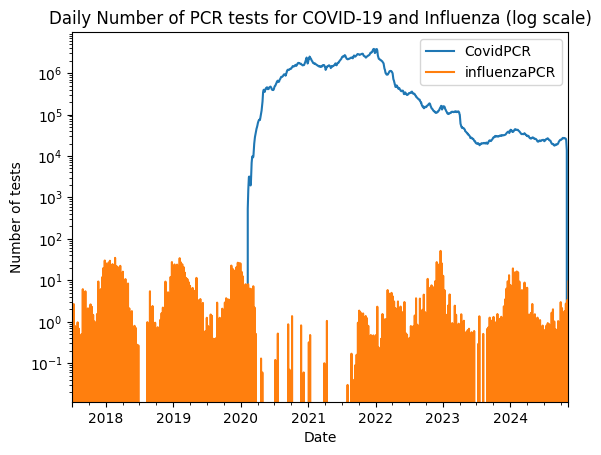

In [8]:
##COMPARE PCR TESTS FOR COVID AND INFLUENZA
pcrTests = {}
for dataset in [CovidPCR, influenzaPCR]:
    for entry in dataset:
        date=entry['date']
        metric=entry['metric']
        value=entry['metric_value']
        if date not in pcrTests:
            pcrTests[date]={}
        pcrTests[date][metric]=value

#convert the combined data into a pandas dataframe
pcrDates=list(pcrTests.keys())
pcrDates.sort()

#convert start and end dates to pandas format for the index data range
pcrStartDate=parse_date(pcrDates[0])
pcrEndDate=parse_date(pcrDates[-1])
print (pcrStartDate, ' to ', pcrEndDate)


#setup data frame
pcrIndex=pd.date_range(pcrStartDate, pcrEndDate, freq='D') #d == days(daily) w ==weekly
pcrtimeseriesdf=pd.DataFrame(index=pcrIndex, columns=['CovidPCR', 'influenzaPCR'])


# translate the columns to our metrics

pcrMetrics ={'CovidPCR': 'COVID-19_testing_PCRcountByDay',
            'influenzaPCR': 'influenza_testing_positivityByWeek',}


for date, entry in pcrTests.items(): # each entry is a dictionary with cases, admissions and deaths
    pd_date=parse_date(date) # convert to Pandas format
    for column in ['CovidPCR', 'influenzaPCR']: 
        metric_name=pcrMetrics[column]
        # do not assume all values are there for every date - if a value is not available, insert a 0.0
        value= entry.get(metric_name, 0.0)
        # this is the way you access a specific location in the dataframe - use .loc
        # and put index,column in a single set of [ ]
        pcrtimeseriesdf.loc[date, column]=value
            
# fill in any remaining "holes" due to missing dates
pcrtimeseriesdf.fillna(0.0, inplace=True)

pcrtimeseriesdf
pcrPlot = pcrtimeseriesdf.plot(logy=True)
pcrPlot.set_ylabel("Number of tests")
pcrPlot.set_title("Daily Number of PCR tests for COVID-19 and Influenza (log scale)")
pcrPlot.set_xlabel("Date")

2015-06-29 00:00:00  to  2024-11-04 00:00:00
           Covid admissions By Day Influenza Admission Rate by Week
2015-07-05                     NaN                              NaN
2015-07-12                     NaN                              NaN
2015-07-19                     NaN                              NaN
2015-07-26                     NaN                              NaN
2015-08-02                     NaN                              NaN
...                            ...                              ...
2024-10-06                     NaN                              NaN
2024-10-13                     NaN                              NaN
2024-10-20                     NaN                              NaN
2024-10-27                     NaN                              NaN
2024-11-03                     NaN                              NaN

[488 rows x 2 columns]


/var/folders/0g/05700__976v93g3f39_3753r0000gn/T/ipykernel_94789/3845607048.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  admissiontimeseriesdf.fillna(0.0, inplace=True)


Text(0.5, 0, 'Date')

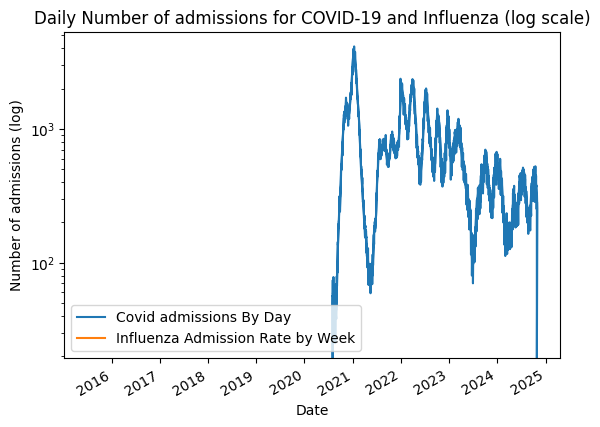

In [9]:
#Admissions
totalAdmissions={}
for dataset in [admissions, influenzaAdmissions]:
    for entry in dataset:
        date=entry['date']
        metric=entry['metric']
        value=entry['metric_value']
        if date not in totalAdmissions:
            totalAdmissions[date]={}
        totalAdmissions[date][metric]=value

admissionDates=list(totalAdmissions.keys())
admissionDates.sort()



admissionStartDate=parse_date(admissionDates[0])
admissionEndDate=parse_date(admissionDates[-1])
print (admissionStartDate, ' to ', admissionEndDate)



admissionIndex=pd.date_range(admissionStartDate, admissionEndDate, freq='W') #d == days(daily) w ==weekly
admissiontimeseriesdf=pd.DataFrame(index=admissionIndex, columns=['Covid admissions By Day', 'Influenza Admission Rate by Week'])
print(admissiontimeseriesdf)

# translate the columns to our metrics
#
admissionMetrics ={'Covid admissions By Day': 'COVID-19_healthcare_admissionByDay',
            'Influenza Admission Rate by Week': 'influenza_admissions',}


for date, entry in totalAdmissions.items(): # each entry is a dictionary with cases, admissions and deaths
    pd_date=parse_date(date) # convert to Pandas format
    for column in ['Covid admissions By Day', 'Influenza Admission Rate by Week']: 
        metric_name= admissionMetrics[column]
        # do not assume all values are there for every date - if a value is not available, insert a 0.0
        value= entry.get(metric_name, 0.0)
        # this is the way you access a specific location in the dataframe - use .loc
        # and put index,column in a single set of [ ]
        admissiontimeseriesdf.loc[date, column]=value
            
# # fill in any remaining "holes" due to missing dates
admissiontimeseriesdf.fillna(0.0, inplace=True)

admissiontimeseriesdf
admissionPlot = admissiontimeseriesdf.plot(logy=True)
admissionPlot.set_ylabel("Number of admissions (log)")
admissionPlot.set_title("Daily Number of admissions for COVID-19 and Influenza (log scale)")
admissionPlot.set_xlabel("Date")


In [10]:
#make pickle files
pcrtimeseriesdf.to_pickle("pcrTests.pkl")
admissiontimeseriesdf.to_pickle("admissionsCompare.pkl")

2020-01-30 00:00:00  to  2024-11-26 00:00:00


Text(0, 0.5, 'Number of Covid Cases and Beds Occupied by Covid Patients')

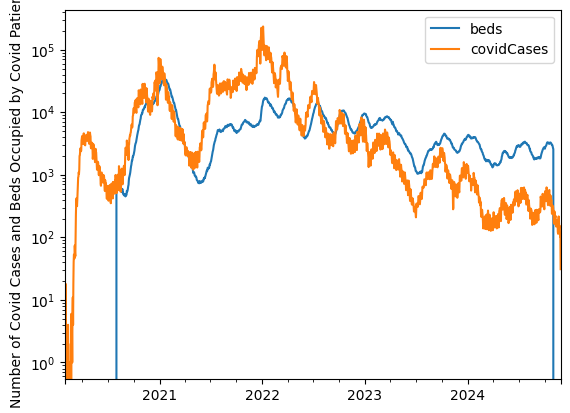

In [11]:
#Covid Cases vs Covid Occupied Beds
covidDayBeds={}
for dataset in [bedsDay, cases]:
    for entry in dataset:
        date=entry['date']
        metric=entry['metric']
        value=entry['metric_value']
        if date not in covidDayBeds:
            covidDayBeds[date]={}
        covidDayBeds[date][metric]=value

covidDayBedsDates=list(covidDayBeds.keys())
covidDayBedsDates.sort()

covidDayBedsStartDate=parse_date(covidDayBedsDates[0])
covidDayBedsEndDate=parse_date(covidDayBedsDates[-1])
print (covidDayBedsStartDate, ' to ', covidDayBedsEndDate)

covidDayBedsIndex=pd.date_range(covidDayBedsStartDate, covidDayBedsEndDate, freq='D') #d == days(daily) w ==weekly
covidDayBedstimeseriesdf=pd.DataFrame(index=covidDayBedsIndex, columns=['beds', 'covidCases'])

bedsMetrics ={'beds': 'COVID-19_healthcare_occupiedBedsByDay',
            'covidCases': 'COVID-19_cases_casesByDay',}

for date, entry in covidDayBeds.items():
    pd_date = parse_date(date)
    for column in ['beds', 'covidCases']:
        metric_name = bedsMetrics[column]
        value = entry.get(metric_name, 0.0)
        covidDayBedstimeseriesdf.loc[date, column] = value


covidDayBedstimeseriesdf.fillna(0.0, inplace=True)
covidBedsPlot = covidDayBedstimeseriesdf.plot(logy=True)
covidBedsPlot.set_ylabel("Number of Covid Cases and Beds Occupied by Covid Patients")

In [12]:
#to pickle
covidDayBedstimeseriesdf.to_pickle("covidDayBeds.pkl")

2015-06-29 00:00:00  to  2024-11-26 00:00:00


/var/folders/0g/05700__976v93g3f39_3753r0000gn/T/ipykernel_94789/3737667103.py:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  alltimeseriesdf.fillna(0.0, inplace=True)


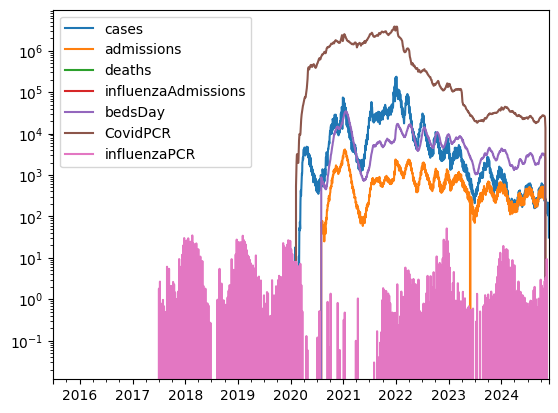

In [13]:


#combine all data into a single dictionary, with dates as keys
allData={}
for dataset in [admissions, cases, deaths, influenzaAdmissions, bedsDay, CovidPCR, influenzaPCR]:
    for entry in dataset:
        date=entry['date']
        metric=entry['metric']
        value=entry['metric_value']
        if date not in allData:
            allData[date]={}
        allData[date][metric]=value




#convert the combined data into a pandas dataframe



dates=list(allData.keys())
dates.sort()



allStartDate=parse_date(dates[0])
allEndDate=parse_date(dates[-1])
print (allStartDate, ' to ', allEndDate)




allIndex=pd.date_range(allStartDate, allEndDate, freq='D') #d == days(daily) w ==weekly
alltimeseriesdf=pd.DataFrame(index=allIndex, columns=['cases', 'admissions', 'deaths', 'influenzaAdmissions', 'bedsDay', 'CovidPCR', 'influenzaPCR'])



# translate the columns to our metrics

allMetrics ={'cases': 'COVID-19_cases_casesByDay',
            'admissions': 'COVID-19_healthcare_admissionByDay',
            'deaths': 'COVID-19_deaths_deathsByDay',
            'influenzaAdmissions': 'influenza_admissions',
            'bedsDay': 'COVID-19_healthcare_occupiedBedsByDay',
            'CovidPCR': 'COVID-19_testing_PCRcountByDay',
            'influenzaPCR': 'influenza_testing_positivityByWeek',}

for date, entry in allData.items(): # each entry is a dictionary with cases, admissions and deaths
    pd_date=parse_date(date) # convert to Pandas format
    for column in ['cases', 'admissions', 'deaths', 'influenzaAdmissions', 'bedsDay','CovidPCR', 'influenzaPCR']: 
        metric_name=allMetrics[column]
        # do not assume all values are there for every date - if a value is not available, insert a 0.0
        value= entry.get(metric_name, 0.0)
        # this is the way you access a specific location in the dataframe - use .loc
        # and put index,column in a single set of [ ]
        alltimeseriesdf.loc[date, column]=value
            
# fill in any remaining "holes" due to missing dates
alltimeseriesdf.fillna(0.0, inplace=True)
alltimeseriesdf.plot(logy=True)
alltimeseriesdf.to_pickle("allData.pkl")

